<a href="https://colab.research.google.com/github/DimosthenisDimoulias/datastories_for_emme/blob/main/stance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving deliberation_comments_104.xlsx to deliberation_comments_104 (5).xlsx


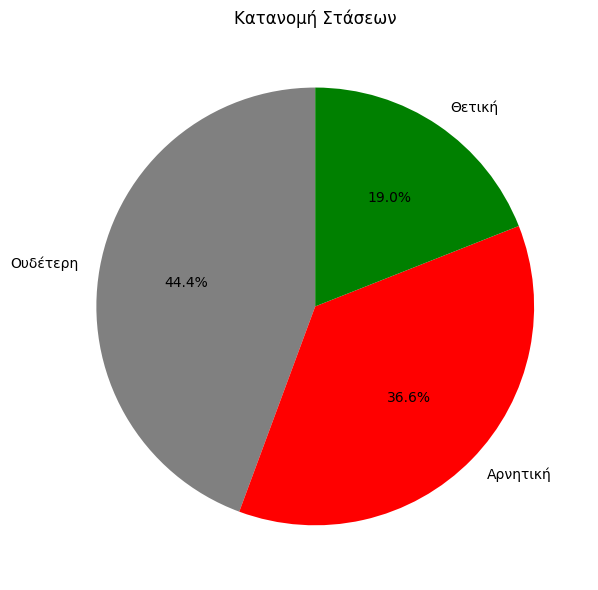

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import string
from google.colab import files

uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0])

# 2. Ορισμός Λεξικών (Μπορείτε να εμπλουτίσετε αυτές τις λίστες)
positive_words = [
    'καλό', 'θετικό', 'συμφωνώ', 'σωστό', 'μπράβο', 'εξαιρετικό', 'αναγκαίο',
    'ανάπτυξη', 'πρόοδος', 'ωραίο', 'ελπίδα', 'ευκαιρία', 'αναβάθμιση', 'υπέρ',
    'συγχαρητήρια', 'αξιόλογο', 'δίκαιο', 'βελτίωση', 'σημαντικό', 'ωφέλιμο'
]

negative_words = [
    'κακό', 'αρνητικό', 'διαφωνώ', 'λάθος', 'ντροπή', 'απαράδεκτο', 'καταστροφή',
    'πρόβλημα', 'άδικο', 'αντισυνταγματικό', 'όχι', 'κρίμα', 'υποβάθμιση', 'κατά',
    'αισχος', 'επικίνδυνο', 'αντιδημοκρατικό', 'παράλογο', 'αποτυχία', 'εναντίον'
]

# 3. Συνάρτηση υπολογισμού συναισθήματος
def get_sentiment(text):
    if not isinstance(text, str):
        return 'Ουδέτερη'
    # Καθαρισμός κειμένου: μετατροπή σε πεζά και αφαίρεση σημείων στίξης
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()

    # Καταμέτρηση λέξεων
    pos_score = sum(1 for word in words if word in positive_words)
    neg_score = sum(1 for word in words if word in negative_words)

    # Λογική απόφασης
    if pos_score > neg_score:
        return 'Θετική'
    elif neg_score > pos_score:
        return 'Αρνητική'
    else:
        return 'Ουδέτερη'

# 4. Εφαρμογή της συνάρτησης στη στήλη 'Σχόλιο'
df['Sentiment'] = df['Σχόλιο'].apply(get_sentiment)

# 5. Εμφάνιση Διαγραμμάτων
sentiment_counts = df['Sentiment'].value_counts()

# Create a single subplot for the pie chart
fig, ax = plt.subplots(figsize=(7, 6)) # Adjusted figsize for a single plot

# Pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax,
                      colors=['gray', 'red', 'green'], startangle=90)
ax.set_title('Κατανομή Στάσεων')
ax.set_ylabel('')

plt.tight_layout()

# Save the figure to a file
plt.savefig('sentiment_pie_chart.png')

# Display the plot
plt.show()

# Provide a download link
files.download('sentiment_pie_chart.png')